# Ejercicio Regresion Lineal

### Alumna: Daniela Olivas Mendoza

En este notebook vamos a describir paso a paso un ejecicio de prediccion, a traves de la regresion lineal, de la cantidad de ocasiones en que sera compartido un articulo de area de Machine Learning presentado en un Blog.

### Predicción: Cantidad de ocasiones en que se compartira el articulo del Blog

Iniciamos importardo librerias, ajustando y visualizando datos

In [1]:
#Importamos librerias y ajustes necesasrios.
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
#Se carga el archivo de datos de entrada csv como dataset de Pandas. Los datos provienen de https://www.kdnuggets.com/
#Revisar cuál es el directorio de trabajo del Jupiter---usar os.getcwd()---y poner al archivo ahí.
data = pd.read_csv("./articulos de blog ml.csv")

Pandas es una librería python destinada al análisis de datos que proporciona estructuras de datos flexibles que permiten trabajar con ellos de forma eficiente. Pandas ofrece las siguientes estructuras de datos: series: Son arrays con idexacion (arrays con indice o etiquetados), similar a los diccionarios. Puede generarse a partir de diccionarios de las listas. Dataframe: Son estructuras de datos similares a las tablas de base de datos relaciones con SQL. Panel, Panel4D y PanelND. Son estructuras de datos que permite trabajar con mas de dos dimensiones.

In [3]:
#Revisamos la dimension (Registros x Columnas) que contiene
data.shape

(161, 8)

In [4]:
#se puede revisar los primeros registros para darnos una idea de los datos
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


Vemos que algunos atributos (columnas) tienes valores nulos (NaN); po ejemplo el atributo url

En este caso el atributo Shares sera la salida: es decir, el valor Y del modelo de regresion lineal. Por lo cual sera el valor que deseamos predecir

In [5]:
# Se realiza una estadistica descriptiva para tener conocimiento inicial de los datos mediante:
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


Se observa que, por ejemplo la media del atributo word count (cantidad de palabras) es 1808.26
Que el articulo mas pequeno contiene 250 palabras y el mas grande tiene 8401 palabras.
Y respecto a cuanto se ha compartido un articulo (#Shares), existe los que nunca se han compartido (0 veces) y el o los recurrentes con 350000 ocasiones (muy popular).

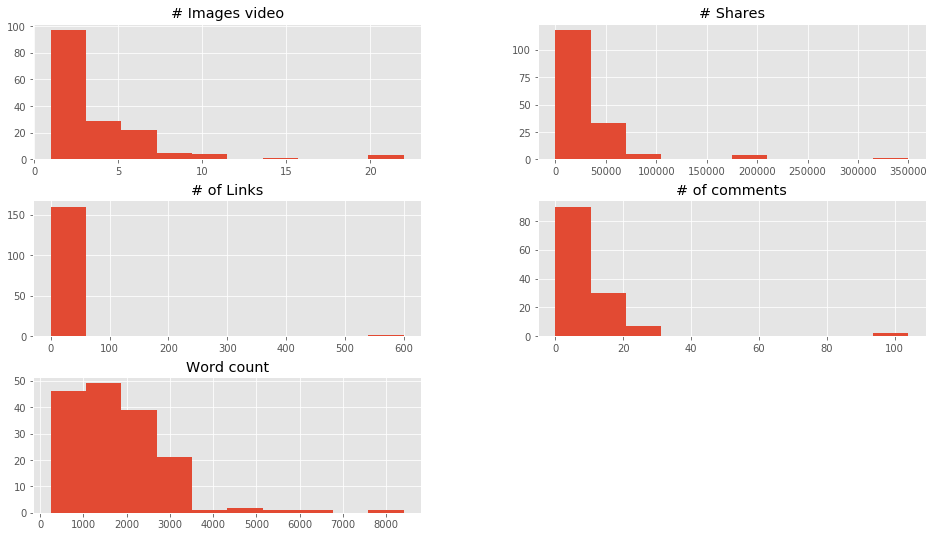

In [6]:
# Se visualizan los atributos de entrada mediante histogramas y barras (cuantitativas y cualitativas)
data.drop(['Title','url','Elapsed days'],1).hist()
plt.show()

Las graficas anteriores comunican entre que valores se concentran la mayoria de los registros.
Seguidamente se filtran los datos por cantidad de palabras dejando los registros con menos de 3500 palabras y tambien por cantidad de compartidos con menos de 80.

### Se puede visualizar por ejemplo cantidad de palabras vs compartidos 

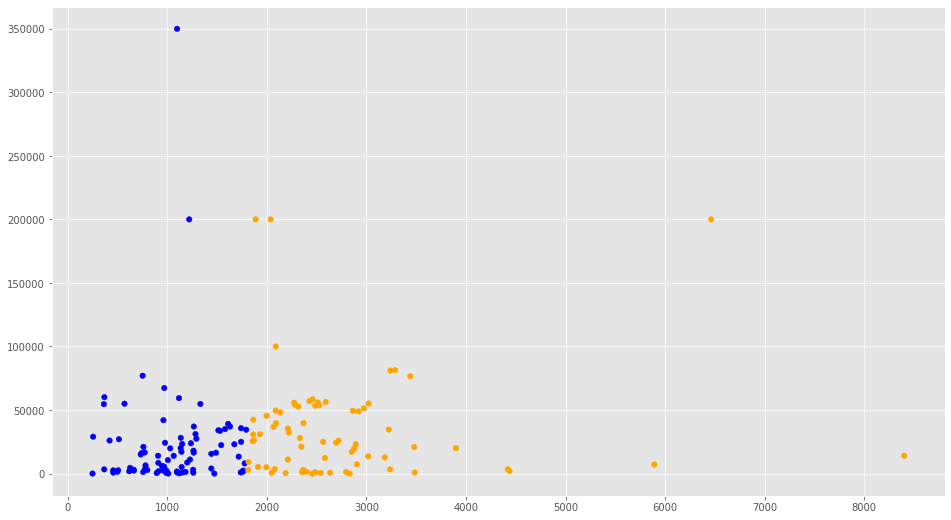

In [7]:
# visualizar datos de entrada
colores = ['orange','blue']
tamanos = [30,60]

f1 = data['Word count'].values
f2 = data['# Shares'].values

# pintamos en dos colores los puntos por debajo de la media de cantidad de palabras
asignar=[]
for index, row in data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
            
plt.scatter(f1, f2, c=asignar, s=tamanos[0])
plt.show()

In [32]:
# VISUALIZAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

# Pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

NameError: name 'tamanios' is not defined

In [31]:
#Se revisan los cambios de valores una vez filtrados.
filtered_data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,148.000000,148.000000,121.000000,148.000000,148.000000,148.000000
mean,1640.209459,5.743243,7.256198,3.331081,91.554054,20545.648649
std,821.975365,6.064418,6.346297,2.706476,91.143923,19933.865031
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,971.000000,3.000000,2.000000,1.000000,28.750000,2750.000000
50%,1536.000000,5.000000,6.000000,3.000000,60.000000,15836.000000
75%,2335.750000,7.000000,11.000000,4.000000,110.500000,34177.500000
max,3485.000000,49.000000,30.000000,22.000000,349.000000,77000.000000


### Regresión lineal simple (1 atributo con Python y SKlearn)

In [ ]:

#Asignamos el atributo de entrada X para entramiento y la etique Y.
dataX = filtered_data[["Word count"]]
x_train = np.array(dataX)
y_train = filtered_data['# Shares'].values

In [33]:
# Se genera el objeto de Regresión Lineal
regr = linear_model.LinearRegression()

# Se entrena el modelo
regr.fit(X_train, y_train)

# Se realizan las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Se revisan los coeficienetes obtenidos, En este caso, será la Tangente
print('Coeficientes: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Término Independente: \n', regr.intercept_)
# Error Cuadrado Medio
print("Media del Error Cuadrado: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Puntaje de la Varianza: %.2f' % r2_score(y_train, y_pred))

NameError: name 'X_train' is not defined

### Visualizacion de la recta obtenida

In [34]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Palabras')
plt.ylabel('Cantidad de veces que se compartio')
plt.title('Regresión Lineal')

plt.show()

NameError: name 'X_train' is not defined

### Preducción 1

In [36]:
# Cuántos "Shares" se obtendrá por un artículo con 2.000 palabras,
# según el modelo se hace:
y_Dosmil = regr.predict([[2000]])
print('Cantidad predecida : ', int(y_Dosmil))

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## Regresión Lineal Múltiples (múltiples atributos)

Se modifica el ejercicio utilizando más de una variable de entrada para el modelo. Esto le da mayor poder al algoritmo de Machine Learning, pues de esta manera podría obtener predicciones más complejas. La “ecuación de la Recta”, será: Y = b + m1 X1 + m2 X2 + … + m(n) X(n) (deja de ser una recta) En este caso, se utilizan 2 “atributos predictivos” para poder graficar en 3D, pero recordar que para mejores predicciones se utilizarían más de 2 entradas y prescindir del gráfico. El primer atributo seguirá siendo la cantidad de palabras y el segundo atributo será la suma de 3 columnas de entrada: la cantidad de enlaces, comentarios y cantidad de imágenes.

In [19]:
# Se pudiera mejorar el Modelo, con una dimensión más: 
# Para poder graficar en 3D, se incluye un atributo extra que será la unión de los enlaces, comentarios e imágenes
union = (filtered_data['# of Links'] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])

dataX2 =  pd.DataFrame()
dataX2['Word count'] = filtered_data['Word count']
dataX2['Unión'] = union
XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values

In [20]:
#Nota: hubiera sido mejor aplicar PCA para reducción de dimensiones, manteniendo la información más importante de todas
#Ya se tienen 2 atributos de entrada en XY_train (dimensiones de entrenamiento serán X y Y) y el atributo de salida será el eje “Z”.
#Se genera un nuevo objeto de Regresión lineal con SKLearn pero esta vez tendrá las dos dimensiones que entrenar: las que contiene XY_train. Al igual que antes, se imprimen los coeficientes y puntajes obtenidos:

In [21]:
# Se genera un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()

# Se entrena el modelo, esta vez, con 2 dimensiones
# Se obtienen 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)

# Se predice con los puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)

# Los coeficientes
print('Coeficientes: \n', regr2.coef_)
# Media del Error Cuadrado
print("Media del Error Cuadrado: %.2f" % mean_squared_error(z_train, z_pred))
# Se evalúa el puntaje de varianza (siendo 1.0 el mejor posible)
print('Puntaje de la Varianza: %.2f' % r2_score(z_train, z_pred))

Coeficientes: 
 [   6.63216324 -483.40753769]
Media del Error Cuadrado: 352122816.48
Puntaje de la Varianza: 0.11


Como se aprecia, se obtuvieron 2 coeficientes (cada uno correspondiente a 2 atributos predictivos), pues ahora lo que se grafica no será una línea si no, un plano en 3 Dimensiones. El error obtenido sigue siendo grande, aunque algo mejor que el anterior y el puntaje de Varianza mejora casi el doble del anterior (aunque sigue siendo muy malo, muy lejos del 1).

## Se visualiza un plano en 3 dimensiones:

Text(0.5, 0.92, 'Regresión Lineal con Múltiples Atributos')

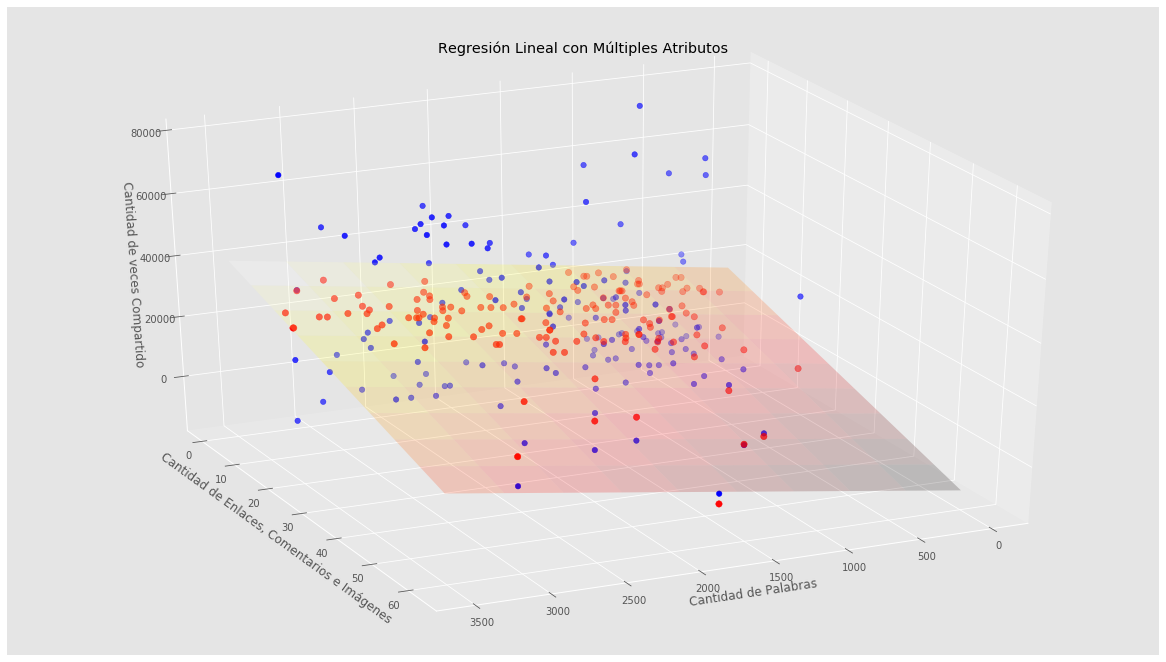

In [22]:
fig = plt.figure()
ax = Axes3D(fig)

# Se genera una malla, sobre la cual se grafica el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))

# Se calculan los valores del plano para los puntos x e y...
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 

# al igual que los correspondientes valores para z. Se debe sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)

# Se grafica el plano...
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

# en azul los puntos en 3D...
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)

# en rojo, los puntos que 
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)

# con esto se situa la "camara" con la que visualizamos
ax.view_init(elev=30., azim=65)
        
ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces, Comentarios e Imágenes')
ax.set_zlabel('Cantidad de veces Compartido')
ax.set_title('Regresión Lineal con Múltiples Atributos')

Se puede rotar el gráfico para apreciar el plano desde diversos ángulos, modificando el valor del parámetro azim en view_init con números del 0 a 360.

## Predicción #2, modelo de Mútiples Atributos.

¿Qué predicción se tendrá para un artículo de 2000 palabras, con 10 enlaces, 4 comentarios y 6 imágenes?

In [24]:
# ¿Cuántos "Shares" se obtendrán por un artículo con: 
# 2000 palabras y con enlaces: 10, comentarios: 4, imágenes: 6
# según el modelo, se hace:

z_Dosmil = regr2.predict([[2000, 10+4+6]])
print('Cantidad predecida : ', int(z_Dosmil))

Cantidad predecida :  20518


La predicción queda en 20518 y probablemente sea un poco mejor que la predicción anterior de 1 un atributo.

## Comparación de las predicciónes obtenidas en los modelos.

En este caso, se obtiene mejora en el modelo de 2 dimensiones.

In [26]:
# Se restan los errores calculados antes... Obviamente, "menos error" es mejor
mejoraEnError = mean_squared_error(y_train, y_pred) - mean_squared_error(z_train, z_pred)
print('Mejora en el error : ', mejoraEnError)

NameError: name 'y_train' is not defined

In [27]:
#También se calcula la mejora en la varianza:
mejoraEnVarianza = r2_score(z_train, z_pred) - r2_score(y_train, y_pred)
print('Mejora en la varianza : ', mejoraEnVarianza)
#Aunque no parezca mucho, recuerde que el valor más alto que se puede obtener es 1.0

NameError: name 'y_train' is not defined

In [28]:
# y aunque disminuyen los "Shares" obtenidos en el 2do modelo, se observa una mejora de la predicción de un artículo 
# de 2.000 palabras, pues seguramente será un valor más cercano a la realidad
diferenciaComparir = z_Dosmil - y_Dosmil
print('Comparación a través de la diferencia : ', int(diferenciaComparir))

NameError: name 'y_Dosmil' is not defined

## Notas Finales; posibles mejoras.

Se ejemplificó el cómo utilizar SKLearn en Python para trabajar modelos de Regresión Lineal con 1 o múltiples atributos. Del ejercicio no se obtuvo una gran confianza en las predicciónes. Por ejemplo, del primer modelo, con 2000 palabras se predicen 22595 pero el margen de error haciendo raíz del error cuadrático medio es aproximadamente 19310. Es decir, escribir un artículo de 2000 palabras lo mismo se obtendrán 3285 "Shares" que 41905. En este caso este modelo se utiliza para aprender a usarlo y habrá que ver en qué casos sí brinde predicciones acertadas. Para mejorar el modelo, se deberían utilizar más dimensiones y encontrar datos de entrada mejores. Atención. Es posible que no exista---nunca---ninguna relación entre atributos de entrada y el éxito en "Shares" del artículo. Por lo que, al ser un simple experimento con datos sintéticos, nunca se predecirá con certeza esta salida.

Este ejemplo utiliza un archivo de datos sintéticos que se integró con información de artículos sobre Machine Learning. Si se desea mejorar las predicciones, se deben utilizar más de 2 atributos (aqui se hizo para poder graficar en 3D). Sería conveniente adicionar y mejorar la calidad de información provista por los atributos de entrada, pues no es lo mismo un enlace a un portal con multitud de visitas al mes, que a otros más modestos.